In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tabula
import glob

### Internal Friction

In [29]:
#path to input file
input_path = glob.glob(os.path.join('../../Data/Extracted_data', "UT_internal_friction*.csv"))

In [30]:
# Reading the selected UT data (Total data tables = 12)
UT_tables = []
for filename in input_path:
    df = pd.read_csv(filename)
    UT_tables.append(df)

In [31]:
UT_tables[0]

,Sample ID,% CW,% change from 0% CW,Standard Error,Standard Error (%)
0,"304, 0% - 1 CW",0,0%,0.013,2.9%
1,"304, 20% - 1 CW",20,50%,0.014,2.0%
2,"304, 40% - 1 CW",40,57%,0.022,3.0%
3,"304, 60% - 1 CW",60,98%,0.010,1.1%
4,"304, 80% - 1 CW",80,94%,0.024,2.7%


In [32]:
# Removing '%' sign from the data and converting it into float format
for i in range(0,len(UT_tables)):
    UT_tables[i]["% change from 0% CW"] = list(map(lambda x: x[:-1], UT_tables[i]["% change from 0% CW"].values))
    UT_tables[i]["% change from 0% CW"] = [float(x) for x in UT_tables[i]["% change from 0% CW"].values]
    UT_tables[i]["Standard Error (%)"]= list(map(lambda x: x[:-1], UT_tables[i]["Standard Error (%)"].values))
    UT_tables[i]["Standard Error (%)"] = [float(x) for x in UT_tables[i]["Standard Error (%)"].values]

In [33]:
UT_tables[11].dtypes

Sample ID               object
% CW                     int64
% change from 0% CW    float64
Standard Error         float64
Standard Error (%)     float64
dtype: object

In [34]:
# Creating a new column 'change from 0% CW' - The metric equivalent to % values
for i in range(0,len(UT_tables)):
    UT_tables[i]["change from 0% CW"]=UT_tables[i]["% change from 0% CW"]*UT_tables[i]["Standard Error"]/UT_tables[i]["Standard Error (%)"]
#     UT_tables[i]["change from 0% CW"]=100*UT_tables[i]["Standard Error"]/UT_tables[i]["Standard Error (%)"]

In [35]:
UT_tables[0] # These are the required final UT tables

,Sample ID,% CW,% change from 0% CW,Standard Error,Standard Error (%),change from 0% CW
0,"304, 0% - 1 CW",0,0.0,0.013,2.9,0.000000
1,"304, 20% - 1 CW",20,50.0,0.014,2.0,0.350000
2,"304, 40% - 1 CW",40,57.0,0.022,3.0,0.418000
3,"304, 60% - 1 CW",60,98.0,0.010,1.1,0.890909
4,"304, 80% - 1 CW",80,94.0,0.024,2.7,0.835556


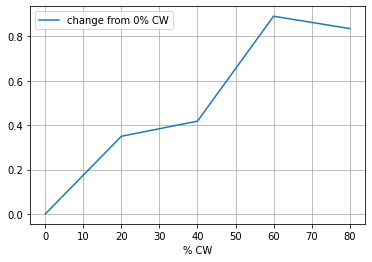

In [36]:
UT_tables[0].plot('% CW','change from 0% CW').grid()

In [37]:
# Creating a new column 'change from 0% CW' - The metric equivalent to % values
for i in range(0,len(UT_tables)):
    UT_tables[i]["change from 0% CW"]=100*UT_tables[i]["Standard Error"]/UT_tables[i]["Standard Error (%)"]

In [38]:
UT_tables[0] 

,Sample ID,% CW,% change from 0% CW,Standard Error,Standard Error (%),change from 0% CW
0,"304, 0% - 1 CW",0,0.0,0.013,2.9,0.448276
1,"304, 20% - 1 CW",20,50.0,0.014,2.0,0.700000
2,"304, 40% - 1 CW",40,57.0,0.022,3.0,0.733333
3,"304, 60% - 1 CW",60,98.0,0.010,1.1,0.909091
4,"304, 80% - 1 CW",80,94.0,0.024,2.7,0.888889


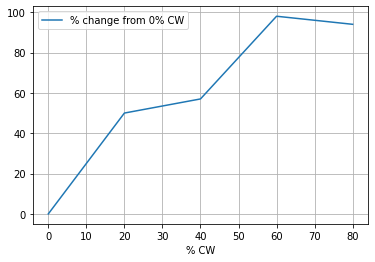

In [39]:
UT_tables[0].plot('% CW','% change from 0% CW').grid()

### Back Scattering data

In [40]:
# Path to the input file
bs_input = os.path.join(os.path.dirname(os.getcwd()), '../Data/Extracted_data/UT_backscattering.csv')

In [41]:
# Reading the file
bs_table=pd.read_csv(bs_input)

In [42]:
BS_tables = []
for i in range(0,len(bs_table.index)):
    if i%5==0:
        BS_tables.append(bs_table.iloc[i:i+5])

In [43]:
BS_tables[3] # These are the required final backscattering files

,Sample ID,% change from 0% CW
15,"A286, 0% CW",0%
16,"A286, 20% CW",-18%
17,"A286, 40% CW",-46%
18,"A286, 60% CW",-40%
19,"A286, 80%-1 CW",-64%


In [44]:
#bs_table_names = ['UT_back_scattering_SS304_15MHz', 'UT_back_scattering_SS316_15MHz', 'UT_back_scattering_SS347_15MHz', 'UT_back_scattering_SSA286_15MHz']

In [45]:
#for table, name in zip(BS_tables, bs_table_names):
#    table.to_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Extracted_data/'+name+'.csv'),index=False)